In [26]:
import mglearn

# 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf").get_name()
rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# 2.3.3 선형 모델

**선형 모델(linear model)**

- 입력 특성에 대한 **선형 함수**를 만들어 예측을 수행

<br>

## 1) 회귀의 선형 모델

- 회귀의 경우 선형 모델을 위한 일반화된 예측 함수는 다음과 같다.

$
\qquad
\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b
$

- $x[0]$ 부터 $x[p]$ 까지  
: 하나의 데이터 포인트에 대한 특성 (특성의 개수 = $p+1$)  
  
  
- $w$와 $b$  
: 모델이 학습할 파라미터  
  
  
- $\hat{y}$  
: 모델이 만들어낸 예측값

- 특성이 하나인 데이터셋에서의 위의 식

$
\qquad
\hat{y} = w[0] \times x[0] + b
$

- 직선의 방정식으로 생각하면 $w[0]$는 기울기이고 $b$는 $y$축과 만나는 절편이다.
- 특성이 많아지면 $w$는 각 특성에 해당하는 기울기를 모두 가진다.
- 즉, 예측값은 입력 특성에 $w$의 각 가중치(음수일 수도 있음)를 곱해서 더한 가중치의 합으로 볼 수 있다.

<br>

**참고) 모델 파라미터와 하이퍼파라미터**

- **모델 파라미터**
  - 머신러닝에서 알고리즘이 주어진 데이터로부터 학습하는 파라미터
  - 파라미터, 계수라고 부름  
  
  
- **하이퍼파라미터(hyperparameter)**
  - 모델이 학습할 수 없어서 사람이 직접 설정해 주어야 하는 파라미터
  - 파이썬 클래스와 함수에 넘겨주는 인수에 포함되므로 **매개변수**라고 부름

<br>

- 1차원 `wave` 데이터셋으로 파라미터 $w[0]$와 $b$를 **[그림 2-11]**의 직선처럼 되도록 학습

w[0]: 0.393906  b: -0.031804


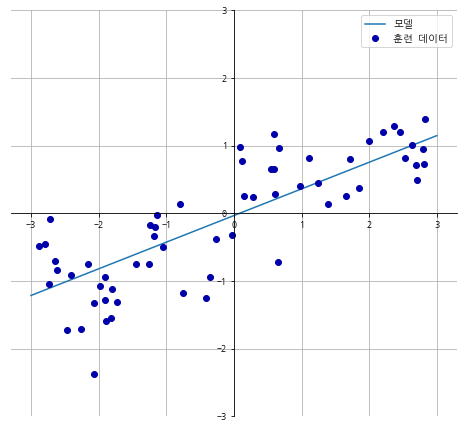

In [2]:
mglearn.plots.plot_linear_regression_wave()

<div style="text-align:left">
    <b>[그림 2-11]</b> wave 데이터셋에 대한 선형 모델의 예측
</div>

- 직선 방정식을 이해하기 쉽도록 그래프의 중앙을 가로질러서 $x$, $y$ 축을 그림
- $w[0]$ 값을 보면 대량 0.4 정도여야 하며, 그래프에서 눈으로 확인 가능

- 회귀를 위한 선형 모델은 다음과 같은 회귀 모델의 특징을 가짐
  - 특성이 하나일 때 : 직선
  - 특성이 두개일 때 : 평면
  - 더 높은 차원(특성이 더 많음) : 초평면(hyperplane)

- 이 직선과 `KNeighborsRegressor`를 사용하여 만든 **[그림 2-10]**의 선과 비교
  - 직선을 사용한 예측이 더 제약이 많아 보임
  - 즉, 데이터의 상세 정보를 모두 잃어버린 것처럼 보임
  - 이는 어느 정도는 사실이다.
  - 타깃 $y$가 특성들의 선형 조합이라는 것은 매우 과한 가정이다.
  - 하지만 1차원 데이터만 놓고 봐서 생긴 편견일 수 있다.
  - 특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있다.
  - 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 $y$도 완벽하게(훈련 세트에 대해서) 선형 함수로 모델링할 수 있다.
  - 선형 대수에서 방정식(훈련 데이터)보다 미지수(모델 파라미터)가 많은 경우를 **불충분한 시스템(underdetermined ststem)**이라고 하며 일반적으로 무수히 많은 해가 존재한다.

- 회귀를 위한 선형 모델은 다양하다.
- 이 모델들은 훈련 데이터로부터 모델 파라미터 $w$와 $b$를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 난다.

<br>

## 2) 선형 회귀(최소제곱법)

- **선형 회귀(linear regression)** 또는 **최소제곱법(OLS, Ordinary Least Squares)**은 가장 간단하고 오래된 회귀용 선형 알고리즘이다.
- 선형 회귀는 훈련 세트에 있는 타깃 $y$ 사이의 **평균제곱오차(MSE, Mean Squared Error)**를 최소화하는 파라미터 $w$와 $b$를 찾는다.
- **평균제곱오차(MSE)**는 예측값과 타깃값의 차이를 제곱하여 더한 후 샘플의 개수로 나눈 것  
  
  
$
\qquad
MSE = {1 \over n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2
$
- 선형 회귀는 **매개변수가 없는 것**이 **장점** $\Rightarrow$ 모델의 복잡도를 제어할 방법도 없음

- 다음은 **[그림 2-11]**의 선형 모델을 만드는 코드이다.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

- 기울기 파라미터($w$)
  - **가중치(weight)** 또는 **계수(coefficient)**라고 함
  - `lr` 객체의 `coef_` 속성에 저장되어 있음  
  
  
- 절편 파라미터($b$)
  - **편향(offset)** 또는 **절편(intercept)**이라고 함
  - `lr` 객체의 `intercept_` 속성에 저장되어 있음

In [4]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973


- `intercept_` 속성은 항상 실수(float)값 하나임
- `coef_` 속성은 각 입력 특성에  하나씩 대응되는 NumPy 배열임
- `wave` 데이터셋에는 입력 특성이 하나뿐이므로 `lr.coef_`도 원소를 하나만 가지고 있음

**NOTE**

- `coef_`와 `intercept_` 뒤의 밑줄은 scikit-learn에서 훈련 데이터에서 유도된 속성은 항상 끝에 밑줄을 붙임
- 이유는 사용자가 지정한 매개변수와 구분하기 위함

<br>

- 훈련 세트와 테스트 세트의 성능 확인 ($R^2$)

In [6]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


- $R^2$값이 0.66인 것은 그리 좋은 결과는 아니다.
- 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷한 것을 알 수 있음
- 이는 과대적합이 아니라 **과소적합**인 상태를 의미
- 1차원 데이터셋에서는 모델이 매우 단순하므로 (혹은 제한적이므로) 과대적합을 걱정할 필요는 없다.
- 그러나 고차원(특성이 많은) 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높다.

<br>

- `LinearRegression` 모델이 보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서 어떻게 동작하는 지 확인
- 이 데이터셋에는 샘플이 506개가 있고 특성은 유도된 것을 합쳐 104개이다.

- 먼저 데이터셋을 읽어 들이고 훈련 세트와 테스트 세트로 나눔
- 그런 다음 이전과 같은 방식으로 선형 모델을 만듬

In [7]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

<br>

- 훈련 세트와 테스트 세트의 점수를 비교

In [8]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


- 훈련 세트에서는 예측이 매우 정확함($R^2$값이 높음)
- 테스트 세트에서는 예측이 정확하지 않다.($R^2$값이 매우 낮음)

- 훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 **과대적합되었다는 확실한 신호**이다.
- 따라서 복잡도를 제어할 수 있는 모델을 사용해야 한다.
- 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델이 바로 **릿지 회귀**이다.

<br>

## 3) 릿지 회귀

- 릿지(Ridge)도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용
- 하지만 릿지 회귀에서의 **가중치($w$) 선택**은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 **추가 제약 조건을 만족시키기 위한 목적**도 있다.  
$\Rightarrow$ 가중치의 절댓값을 가능한 한 작게 만드는 것 (i.e. $w$의 모든 원소가 0에 가깝게 되길 원함)
- 이는 특성이 출력에 주는 영향을 최소한으로 만듬 (기울기를 작게 만듬)
- 이런 제약을 **규제(regularization)**라고 한다.

**규제**

- 과대적합이 되지 않도록 모델이 강제로 제한한다는 의미
- 릿지 회귀에 사용하는 규제 방식을 **L2 규제**라고 한다.

**참고) L2 norm**

- 수학적으로 릿지는 계수의 L2 노름(norm)의 **제곱**을 페널티로 적용함
- 평균제곱오차(MSE) 식에 아래 항을 추가 ($MSE + L2 \; norm$)

$
\qquad
\alpha \sum_{j=1}^{m} {w_j}^2
$

- $\alpha$를 크게 하면 페널티의 효과가 커짐 (가중치 감소)
- $\alpha$를 작게 하면 페널티의 효과가 작아짐 (가중치 증가)

<br>

- 릿지 회귀는 `linear_model.Ridge`에 구현되어 있음
- 릿지 회귀가 확장된 보스턴 주택가격 데이터셋에 어떻게 적용되는 지 확인

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


- 훈련 세트에서의 점수는 `LinearRegression`보다 낮지만 테스트 세트에 대한 점수는 더 높다.
- 즉, 선형 회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어진다.
- 모델의 복잡도가 낮아지면 훈련 세트에서의 성능이 나빠지지만 더 일반화된 모델이 된다.
- 우리가 관심 있는 것은 테스트 세트에 대한 성능이기 때문에 `LinearRegression`보다 `Ridge` 모델을 선택해야 한다.

<br>

- Ridge는 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공
- 사용자는 **`alpha` 매개변수**로 훈련 세트의 성능 대비 모델을 얼마나 단순화할 지를 지정할 수 있다.
- 앞의 예제에서는 매개변수의 기본값인 `alpha=1.0`을 사용했다.  
(`Ridge` 객체를 만들 때 아무런 매개변수를 지정하지 않으면 `alpha` 매개변수의 값이 `1.0`이 된다.)
- 최적의 `alpha` 값은 사용하는 데이터셋에 달려있다.
- `alpha`값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.

In [11]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


<br>

- `alpha` 값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 **[그림 2-1]**의 오른쪽으로 이동하게 된다.
- 아주 작은 `alpha`값은 계수를 거의 제한하지 않으므로 `LinearRegression`으로 만든 모델과 거의 같아짐  
(`alpha=0.00001`로 지정하면 `LinearRegression`에서 얻은 훈련 세트 점수 0.95, 테스트 세트 점수 0.61과 완전히 같게 됨)

In [12]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


- 이 코드에서 `alpha=0.1`이 꽤 좋은 성능을 낸 것으로 보임
- 테스트 세트에 대한 성능이 높아질 때까지 `alpha`값을 줄일 수 있을 것이다.
- 여기서는 `alpha`값이 **[그림 2-1]**의 모델 복잡도와 어떤 관련이 있는지를 살펴봤다.  
(좋은 매개변수를 선택하는 방법은 5장에서 확인)

<br>

- `alpha` 값에 따라 모델의 `coef_` 속성이 어떻게 달라지는 지 확인하면 `alpha` 매개변수가 모델을 어떻게 변경시키는 지 더 깊게 이해할 수 있다.
- 높은 `alpha` 값  
$\Rightarrow$ 제약이 더 많은 모델  
$\Rightarrow$ 작은 `alpha` 값일 때보다 `coef_`의 절댓값 크기가 작을 것이라고 예상할 수 있음
- **[그림 2-12]**를 보면 이러한 사실을 확인 가능

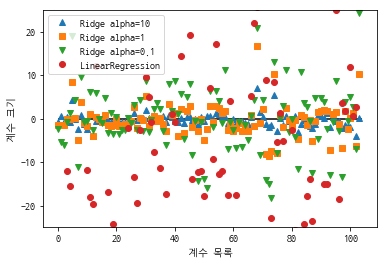

In [22]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

<div style="text-align:left">
    <b>[그림 2-12]</b> 선형 회귀와 몇 가지 alpha 값을 가진 릿지 회귀의 계수 크기 비교
</div>

- **x축** : `coef_`의 원소를 위치대로 나열한 것
  - `x=0` : 첫 번째 특성에 연관된 계수
  - `x=1` : 두 번째 특성에 연관된 계수  
  $\vdots$
  - `x=100` : 100 번째 특성에 연관된 계수  
  
  
- **y축** : 각 계수의 수치

- `alpha=10` : 대부분의 계수는 -3과 3 사이에 위치
- `alpha=1` : Ridge 모델의 계수는 좀 더 커짐
- `alpha=0.1` : 계수는 더 커지며 아무런 규제가 없는(`alpha=0`) 선형 회귀의 계수는 값이 더 커져 그림 밖으로 넘어감

<br>

- 규제의 효과를 이해하는 또 다른 방법 : `alpha` 값을 고정하고 훈련 데이터의 크기를 변화
- **[그림 2-13]**은 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 `LinearRegression`과 `Ridge(alpha=1)`을 적용한 것

**참고) 학습 곡선(learning curve)**

- 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프
- 훈련 과정을 여러 번 반복하면서 학습하는 알고리즘에서는 반복의 횟수에 따른 성능 변화를 나타내는 그래프

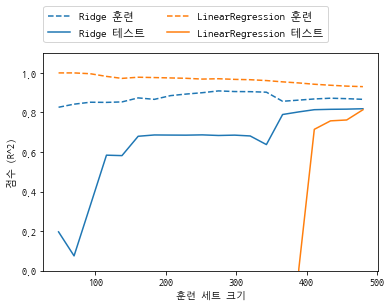

In [23]:
mglearn.plots.plot_ridge_n_samples()

<div style="text-align:left">
    <b>[그림 2-13]</b> 보스턴 주택가격 데이터셋에 대한 릿지 회귀와 선형 회귀의 학습 곡선
</div>

- 예상대로 모든 데이터셋에 대해 릿지와 선형 회귀 모두 **훈련 세트의 점수가 테스트 세트의 점수보다 높다.**
- 릿지에는 규제가 적용  
$\Rightarrow$ 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮다.  
$\Rightarrow$ 그러나 테스트 데이터에서는 릿지의 점수가 더 높음 (특별히 작은 데이터셋에서는 더 그렇다.)

- 데이터셋 크기가 400 미만에서는 선형 회귀는 어떤 것도 학습하지 못하고 있다.
- 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 릿지 회귀를 따라잡는다.  
$\Rightarrow$ **데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능은 같아질 것이다.**

- 또 하나 주목할만한 점 : 선형 회귀의 훈련 데이터 성능이 감소한다는 것
- 이는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.

<br>

## 4) 라쏘

- 선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있다.
- 릿지 회귀와 같이 라쏘(Lasso)도 계수를 0에 가깝게 만들려고 한다.
- 하지만 방식이 조금 다름
- 이를 **L1 규제**라고 한다.

**참고) L1 norm**

- 라쏘는 계수 벡터의 L1노름을 페널티로 사용한다.
- 즉, 계수의 **절댓값의 합**이다.
- 평균제곱오차(MSE) 식에 아래 항을 추가 ($MSE + L1 \; norm$)

$
\qquad
\alpha \sum_{j=1}^{m} |w_j|
$

- $\alpha$를 크게 하면 페널티의 효과가 커짐(가중치 감소)
- $\alpha$를 작게 하면 페널티의 효과가 작아짐(가중치 증가)

- L1 규제의 결과로 라쏘를 사용할 때 어떤 계수는 정말 0이 된다.  
(모델에서 완전히 제외되는 특성이 생긴다는 뜻)
- 어떻게 보면 **특성 선택(feature selection)**이 자동으로 이뤄진다고 볼 수 있다.
- 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.

<br>

- 확장된 보스턴 주택가격 데이터셋에 라쏘를 적용

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 수 : 4


- Lasso는 훈련 세트와 테스트 세트 모두에서 결과가 좋지 않다.
- 이는 **과소적합**이며 104개의 특성 중 4개만 사용한 것을 볼 수 있다.

- Lasso도 계수를 얼마나 강하게 0으로 보낼지를 조절하는 `alpha` 매개변수를 지원
- 앞에서는 기본값인 `alpha=1.0`을 사용
- 과소적합을 줄이기 위해 `alpha` 값을 줄여보겠다.
- 이렇게 하려면 `max_iter`(반복 실행하는 횟수)의 기본값을 늘려야 한다.

**참고) 반복 횟수**

- Lasso는 L1, L2 규제를 함께 쓰는 **엘라스틱넷(Elastic-Net)** 방식에서 L2 규제가 빠진 것
- Lasso의 `alpha` 매개변수는 R의 엘라스틱넷 패키지인 `glmnet`의 `lambda` 매개변수와 같은 의미이다.
- 이들은 한 특성씩 좌표축을 따라 최적화하는 좌표 하강법(coordinate descent) 방식을 사용
- 학습 과정이 반복적으로 여러 번 진행되면서 최적의 값을 찾아가게 된다.
- `alpha` 값을 줄이게 되면 가장 낮은 오차를 찾아가는 이 반복 횟수가 늘어나게 된다.
- 모델이 수행한 반복 횟수는 Lasso 객체의 `n_iter_` 속성에 저장되어 있으므로 `print(lasso.n_iter_)`로 값 확인 가능

In [29]:
# "max_iter" 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 수 : 33


- `alpha` 값을 낮추면 모델의 복잡도는 증가 $\Rightarrow$ 훈련 세트와 테스트 세트에서의 선응은 좋아짐
- 성능은 Ridge보다 조금 나은 데 사용된 특성은 104개 중 33개뿐임 $\Rightarrow$ 모델을 분석하기가 조금 더 쉽다.

- 그러나 `alpha` 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 `LinearRegression`의 결과와 비슷해진다.

In [31]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 수 : 96


<br>

- **그림[2-12]**와 비슷하게 `alpha` 값이 다른 모델들의 계수를 그래프로 표현
- 결과는 **[그림 2-14]**와 같다.

Text(0, 0.5, '계수 크기')

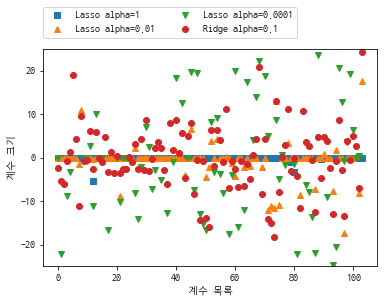

In [38]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))

plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

<div style="text-align:left">
    <b>[그림 2-14]</b> 릿지 회귀와 alpha 값이 다른 라쏘 회귀의 계수 크기 비교
</div>

- `alpha=1` 일 때
  - 계수 대부분이 0
  - 나머지 계수들도 크기가 작다.  
  
  
- `alpha=0.1` 일 때
  - 대부분의 특성이 0이 되는(정삼각형 모양으로 나타낸) 분포를 얻게 된다.  
  
  
- `alpha=0.0001` 일 때
  - 계수 대부분이 0이 아님
  - 값도 커져 꽤 규제받지 않은 모델을 얻게 됨  
  
  
- 비교를 위해 릿지 회귀를 원 모양으로 나타냄

- `alpha=0.1` 인 Ridge 모델은 alpha=0.01`인 라쏘 모델과 성능이 비슷
- 하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않는다.  

<br>

- 실제로 이 두 모델 중 보통은 **릿지 회귀를 선호**
- 하지만 특성이 많고 그중 일부분만 중요하다 $\Rightarrow$ Lasso가 더 좋은 선택일 수 있다.
- 분석하기 쉬운 모델을 원한다 $\Rightarrow$ Lasso가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어 줄 것

- scikit-learn은 Lasso와 Ridge의 페널티를 결합한 **ElasticNet**도 제공한다.
- 실제로 이 조합은 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야 한다.

**참고) ElasticNet**

- ElasticNet에 있는 `l1_ratio` 매개변수는 R의 `glimnet` 패키지의 `alpha` 매개변수와 동일한 것
- L1 규제와 L2 규제의 비율을 조정한다.
- `l1_ratio`는 0과 1 사이의 값을 지정
- L2의 비율은 `1 - l1_ratio`가 되는 방식  
  
  
- ElasticNet의 규제 식은 다음과 같다.  

$\quad$ alpha $\times$ l1_ratio $\times \sum_{j=1}^m | w_j | + {1 \over 2} \times$ alpha $\times$ ( 1 - l1_ratio ) $\times \sum_{j=1}^m {w_j}2$

- 이 식의 L1 규제와 L2 규제를 각각 `l1`, `l2`란 매개변수로 표현한 식은 다음과 같다.  

$\quad$ $l_1$ $\times \sum_{j=1}^m | w_j | + {1 \over 2} \times$ $l_2$ $\times \sum_{j=1}^m {w_j}2$

- 이때 alpha와 l1_ratio은 다음과 같다.  

$\quad$ alpha = $l_1$ + $l_2$, l1_ratio = ${l_1 \over l_1 + l_2}$

- 따라서 규제의 정도 l1, l2에 맞추어 alpha와 l1_ratio를 지정할 수 있다.

<br>

## 5) 분류용 선형 모델

- 선형 모델은 분류에도 널리 사용한다.

<br>

### 5-1) 이진 분류 (binary classification)

- 이진 분류에서 예측을 위한 방정식은 다음과 같다.  

$\quad$ $\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b \gt 0$

- 이 방정식은 선형 회귀와 아주 비슷하다.
- 하지만 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교한다.
- 함수에서 계산한 값이 0보다 작다 $\Rightarrow$ 클래스를 -1이라고 예측
- 함수에서 계산한 값이 0보다 크다 $\Rightarrow$ 클래스를 +1이라고 예측
- 이 규칙은 분류에 쓰이는 모든 선형모델에서 동일하다.
- 여기에서도 계수($w$)와 절편($b$)을 찾기 위한 방법이 많이 있다.

**참고) 시그모이드 함수**

- 로지스틱 회귀는 선형 함수에 **시그모이드 함수**가 적용된 것으로 종종 표현된다.
- 분류의 기준이 되는 시그모이드 함수의 결괏값은 0.5로 선형 함수가 0이 때이므로 선형 함수를 기준으로도 나타낼 수 있다.
- scikit-learn에서 로지스틱 회귀의 `predict` 메서드는 선형 함수 값을 계산해주는 `decision_function` 메서드를 사용해 0을 기준으로 예측을 만든다.
- 시그모이드 함수를 적용한 확률값은 `predict_proba` 메서드에서 제공한다.

- 회귀용 선형 모델에서는 출력 $\hat{y}$이 특성의 선형 함수였다.
- 즉, 직선, 평명, 초평면(차원이 3 이상일 때)이다.

- 분류형 선형 모델에서는 **결정 경계**가 입력의 선형 함수이다.
- 다른 말로 하면 (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 분류하는 분류기이다.

- 선형 모델을 학습시키는 알고리즘은 다음 두 방법으로 구분할 수 있다.
  1. 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는 지 측정하는 방법
  2. 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

- 알고리즘들은 훈련 세트를 잘 학습하는 지 측정하는 방법이 각기 다르다.
- 수학적이고 기술적인 이유로, 알고리즘들이 만드는 잘못된 분류의 수를 최소화하도록 $w$와 $b$를 조정하는 것이 불가능하다.
  - 분류에서 잘못 분류된 결과를 직접 나타내는 0-1 손실 함수는 **완전한 계단 함수**이다.
  - 따라서 대리할 수 있는 다른 함수(currogate loss function)를 사용하여 최적화를 수행한다.
- 많은 애플리케이션에서 앞 목록의 첫 번째 항목(**손실 함수; loss function**)에 대한 차이는 크게 중요하지 않다.

- 가장 널리 알려진 두 개의 선형 분류 알고리즘
  - `linear_model.LogisticRegression`에 구현된 **로지스틱 회귀(logistic regression)**
  - `svm.LinearSVC`에 구현된 선형 **서포트 벡터 머신(support vector machine)** (SVC : Support Vector Classifier)
- `LogisticRegression`은 이름에 'Regression(회귀)'이 들어있지만 회귀 알고리즘이 아니라 **분류 알고리즘**이므로 `LinearRegression`과 혼동하면 안된다.

- `forge` 데이터셋을 사용하여 `LogisticRegression`과 `LinearSVC` 모델을 만들고 이 선형 모델들이 만들어낸 결정 경계를 그림으로 나타내보자.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


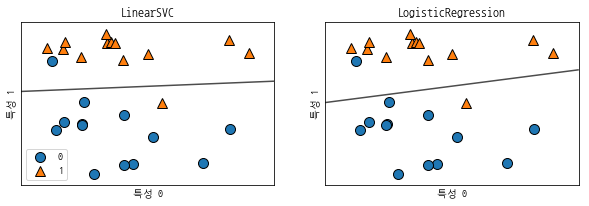

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

<div style="text-align:left">
    <b>[그림 2-15]</b> forge 데이터셋에 기본 매개변수를 사용해 만든 선형 SVM과 로지스틱 회귀 모델의 결정 경계
</div>

- 이 그림은 이전처럼 `forge` 데이터세의 첫 번째 특성을 x축에 놓고 두 번째 특성을 y축에 놓았다.
- `LinearSVC`와 LogisticRegression`으로 만든 결정 경계가 직선으로 표현됨
- 위쪽은 클래스 1, 아래쪽은 클래스 0으로 나누고 있음
- 다르게 말하면 새로운 데이터가 이 직선 위쪽에 놓이면 클래스 1로 분류될 것이고 반대로 직선 아래쪽에 놓이면 클래스 0으로 분류될 것이다.

- 이 두 모델은 비슷한 결정 경계를 만들었다.
- 그리고 똑같이 포인트 두 개를 잘못 분류했다.
- 회귀에서 본 Ridge와 마찬가지로 이 두 모델은 기본적으로 L2 규제를 사용한다.

- `LogisticRegression`과 `LinearSVC`에서 규제의 강도를 결정하는 매개변수는 `C`이다.
- `C`의 값이 높아지면 규제가 감소
  - 매개변수로 높은 `C` 값을 지정 $\Rightarrow$ `LogisticRegression`과 `LinearSVC`는 훈련 세트에 가능한 최대로 맞추려 함
  - 매개변수로 낮은 `C` 값을 지정 $\Rightarrow$ 계수 벡터($w$)가 0에 가까워지도록 만듬

- 매개변수 `C`의 작동 방식을 다르게 설명할 수도 있다.
  - `C`의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 한다.
  - `C`의 값이 높아지면 개개의 데이터 포인트를 정확히 분류하려고 노력할 것이다.

<br>

- **[그림 2-16]**은 `LinearSVC`를 사용한 예이다.

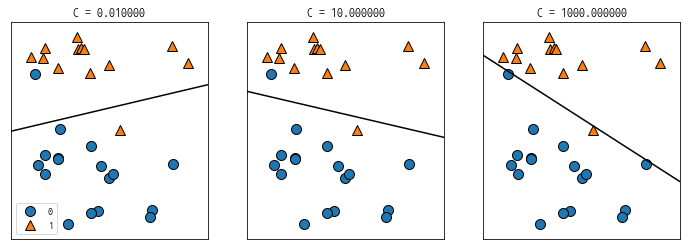

In [41]:
mglearn.plots.plot_linear_svc_regularization()

<div style="text-align:left">
    <b>[그림 2-16]</b> forge 데이터셋에 각기 다른 C 값으로 만든 선형 SVM 모델의 결정 경계
</div>

- 왼쪽 그림은 아주 작은 `C` 값 때문에 규제가 많이 적용되었다.  
(클래스 0의 대부분은 아래에 있고 클래스 1의 대부분은 위에 있음)  
  
  
- 규제가 강해진 모델은 비교적 수평에 가까운 결정 경계를 만듬
- 잘못 분류한 데이터 포인트는 두 개  
  
  
- 중간 그림은 `C` 값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어짐  
  
  
- 오른쪽 그림에서 `C` 값을 아주 크게 하였더니 결정 경계는 더 기울었고 클래스 0의 모든 데이터 포인트를 올바로 분류했음
- 오른쪽 그림의 모델은 모든 데이터 포인트를 정확하게 분류하려고 애썼지만 클래스의 전체적인 배치를 잘 파악하지 못한 것
- 다시 말해 오른쪽 모델은 과대적합된 것 같다.

<br>

- 회귀와 비슷하게